# El problema de la moneda

Los problemas de monedas son clásicos cuando hablamos de probabilidad y estadística, nos permiten ejemplificar conceptos abstractos de forma simple. Asimismo, pueden ser muchas veces conceptualmente similares a situaciones reales, de hecho cualquier problema en donde obtengamos resultados binarios, 0/1, enfermo/sano, spam/no-spam, puede ser pensado como si estuviéramos hablando de monedas. En este caso, la idea es utilizar un modelo bayesiano para inferir si la moneda se encuentra sesgada o no.

Para este ejemplo, vamos a utilizar una distribución binomial como likelihood y una distribución beta como a priori. Veamos como lo podemos modelar con PyMC3.

In [4]:
# importando modulos necesarios
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import pymc3 as pm
import theano.tensor as tt
from sklearn import datasets
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import arviz as az

np.random.seed(1984) #replicar random

%matplotlib inline

In [5]:

# El problema de la moneda
# de 100 lanzamientos 80 caras
n = 100
caras = 80

In [7]:
# Creación del modelo
niter = 2000
with pm.Model() as modelo_moneda:
    # a priori
    p = pm.Beta('p', alpha=2, beta=2)
    # likelihood
    y = pm.Binomial('y', n=n, p=p, observed=caras)

In [8]:
# Realizando el muestreo para la inferencia
with modelo_moneda:
    trace = pm.sample(niter, cores=4)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 65 seconds.
The acceptance probability does not match the target. It is 0.8814726714600133, but should be close to 0.8. Try to increase the number of tuning steps.


C:\Users\USER\Anaconda3\lib\site-packages\arviz\data\io_pymc3.py:89: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


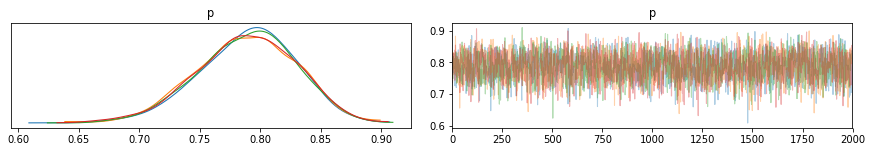

In [9]:
# Analizando los resultados
az.plot_trace(trace, var_names=('p'))
pass

In [10]:
# Información resumen. 
#Vemos que hay un 97% de probabilidades de que el valor de sesgo 
pm.summary(trace)


C:\Users\USER\Anaconda3\lib\site-packages\arviz\data\io_pymc3.py:89: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
p,0.788,0.04,0.712,0.86,0.001,0.0,3278.0,3270.0,3293.0,5373.0,1.0


Como vemos el modelo nos indica que la moneda parece tener un claro sesgo hacia cara.